In [ ]:
# Modules and Libraries used
import pandas as pd
from sklearn.preprocessing import StandardScaler
from seaborn import distplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer

In [ ]:
# Data used
df = pd.read_csv("/content/drive/MyDrive/0_Hackathon_SBSSU/liver cd/ilpd_md1.csv")
df.head(5)

,a_g_ratio,gender,age,t_bilirubin,d_bilirubin,alkphos,sgpt,sgot,t_protein,albumin,result
0,0.90,0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,1
1,0.74,1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,1
2,0.89,1,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,1
3,1.00,1,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1
4,0.40,1,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,1


In [ ]:
df = df.astype({'age':'int64','alkphos':'int64','sgot':'int64','sgpt':'int64'})
df.head()

,a_g_ratio,gender,age,t_bilirubin,d_bilirubin,alkphos,sgpt,sgot,t_protein,albumin,result
0,0.90,0,65,0.7,0.1,187,16,18,6.8,3.3,1
1,0.74,1,62,10.9,5.5,699,64,100,7.5,3.2,1
2,0.89,1,62,7.3,4.1,490,60,68,7.0,3.3,1
3,1.00,1,58,1.0,0.4,182,14,20,6.8,3.4,1
4,0.40,1,72,3.9,2.0,195,27,59,7.3,2.4,1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

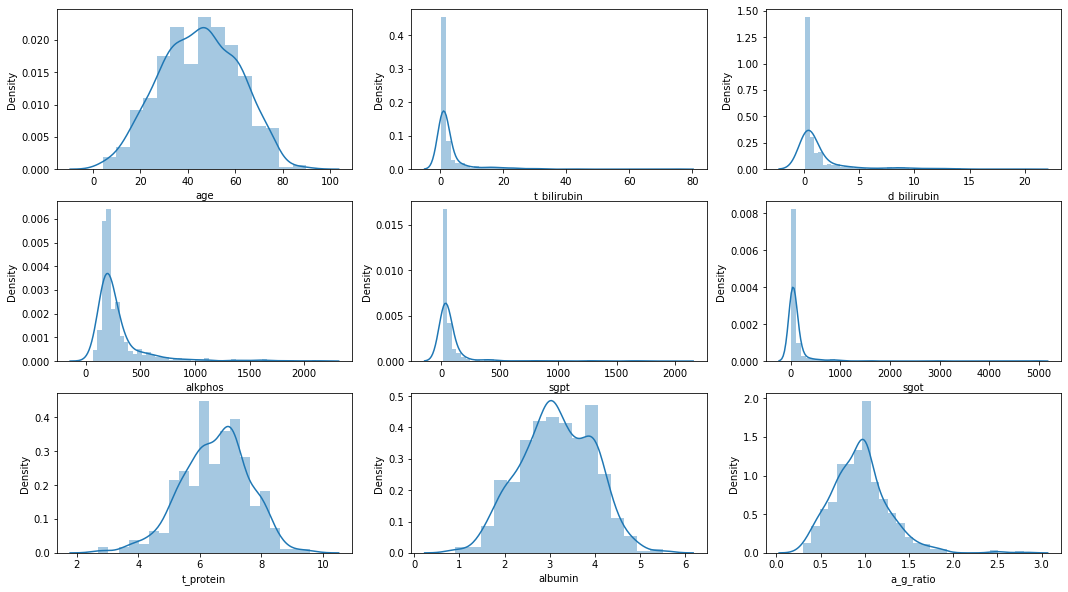

In [ ]:
# Drawing the Distplots of all numerical features
ilpd_fig = plt.figure(figsize=(18,10))
columns = ['age','t_bilirubin','d_bilirubin',
           'alkphos','sgpt','sgot',
           't_protein','albumin','a_g_ratio']

i=1
for col in columns:
  plt.subplot(3,3,i)
  distplot(df[col])
  i = i+1
plt.plot

# Distplots Summary and Observation

**Normal distributed data** :
> age, t_protein, albumin, a_g_ratio



**Skewed Distributed data** :
> t_bilirubin, d_bilirubin, alkphos, sgpt, sgot

---
Conclusion : For outlier detection

**Z-Score** method is used for Normal Distributed data

**IQR** Method is used for Skewed Distributed data

---


# Outlier Detection and Treatment - Normally dist. Data

In [ ]:
def handle_outlier_normal(col):
  lower_limit = df[col].mean() - 3 * df[col].std()
  upper_limit = df[col].mean() + 3 * df[col].std()
  
  df[col] = np.where(
      df[col]>upper_limit,
      upper_limit,
      np.where(
          df[col]<lower_limit,
          lower_limit,
          df[col]
          )
      )

**np.where clause**

np.where

( condition,

if True ,

if False )

In [ ]:
# Detecting and Handling outliers in :
# age
handle_outlier_normal('age')
# t_protein
handle_outlier_normal('t_protein')
# albumin
handle_outlier_normal('albumin')
# a_g_ratio
handle_outlier_normal('a_g_ratio')

# Outlier Detection and Treatment - Skewed dist. Data

In [ ]:
def handle_outlier_skew(col):
  q1 = df[col].quantile(0.25)
  q2 = df[col].quantile(0.50)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1

  lower_limit = q1 - 1.5 * iqr
  upper_limit = q3 + 1.5 * iqr

  df[col] = np.where(
      df[col]>upper_limit,
      upper_limit,
      np.where(
          df[col]<lower_limit,
          lower_limit,
          df[col]
          )
      )

In [ ]:
# Detecting and Handling outliers in :
skew = ['t_bilirubin','d_bilirubin','alkphos','sgpt','sgot']
for col in skew:
  handle_outlier_skew(col)

# After Handling Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

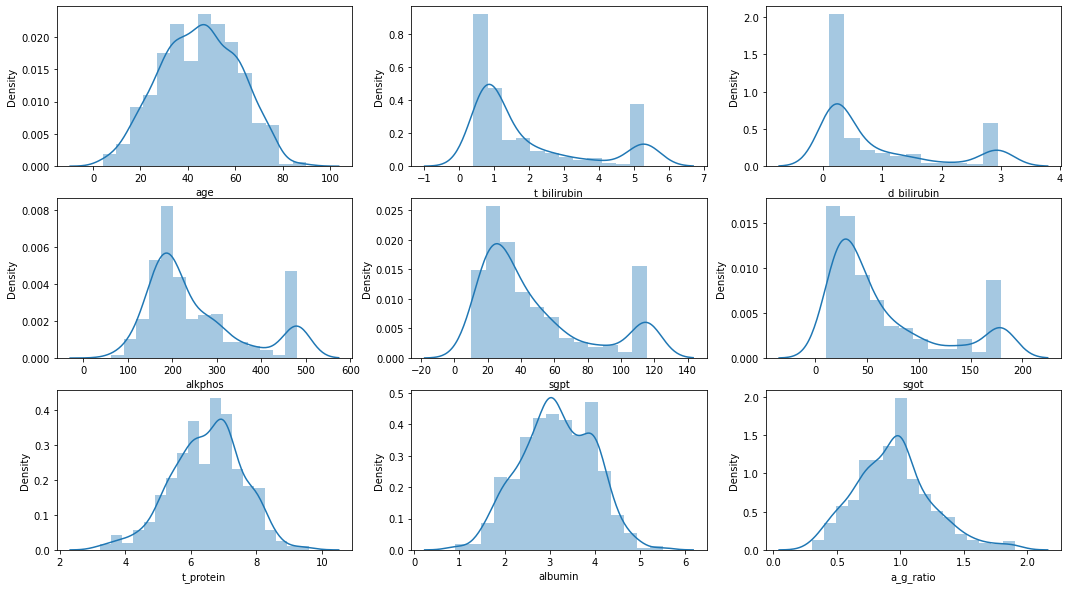

In [ ]:
# Drawing the Distplots of all numerical features
ilpd_fig = plt.figure(figsize=(18,10))
columns = ['age','t_bilirubin','d_bilirubin',
           'alkphos','sgpt','sgot',
           't_protein','albumin','a_g_ratio']

i=1
for col in columns:
  plt.subplot(3,3,i)
  distplot(df[col])
  i = i+1
plt.plot

# To CSV - Outliers handled

In [ ]:
df.to_csv('ilpd_md2.csv',index=False)

# Normalising the Data (Standard Scaling)

In [ ]:
scaler = StandardScaler()
new_df = pd.DataFrame(scaler.fit_transform(df),columns=['a_g_ratio', 'gender', 'age', 't_bilirubin', 'd_bilirubin', 'alkphos',
       'sgpt', 'sgot', 't_protein', 'albumin', 'result'])

new_df['gender'] = df['gender']
new_df['result'] = df['result']
new_df.head()

,a_g_ratio,gender,age,t_bilirubin,d_bilirubin,alkphos,sgpt,sgot,t_protein,albumin,result
0,-0.146548,0,1.241741,-0.738193,-0.783935,-0.586969,-0.956993,-0.866958,0.279091,0.189737,1
1,-0.675220,1,1.056874,2.046760,2.080443,2.090774,0.499659,0.669013,0.926874,0.064127,1
2,-0.179590,1,1.056874,2.046760,2.080443,2.090774,0.378272,0.069610,0.464172,0.189737,1
3,0.183872,1,0.810385,-0.556566,-0.482422,-0.632508,-1.017687,-0.829495,0.279091,0.315348,1
4,-1.798649,1,1.673096,1.199165,1.125650,-0.514105,-0.623177,-0.098972,0.741793,-0.940754,1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

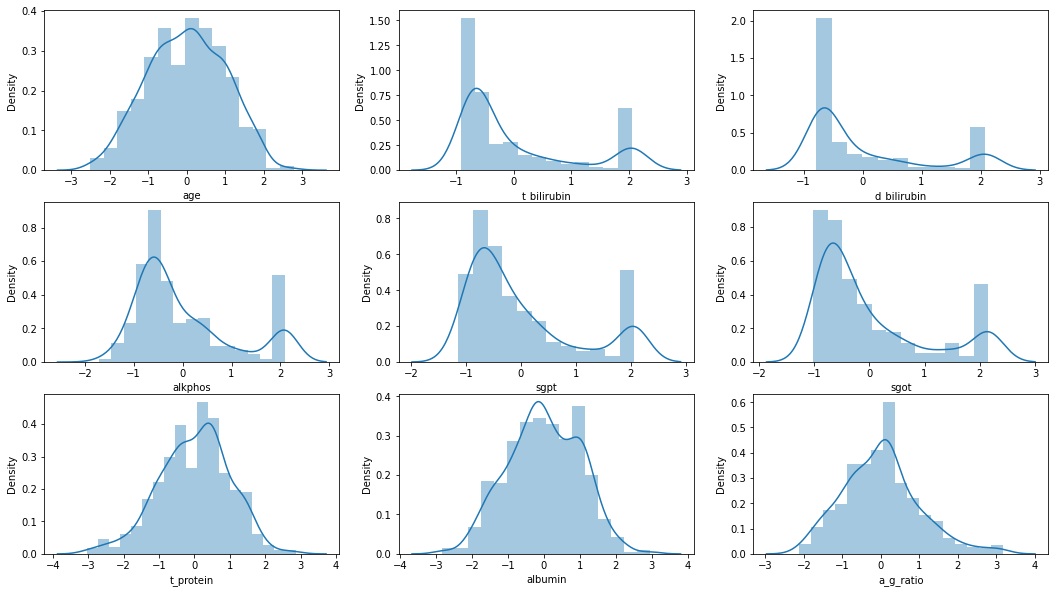

In [ ]:
# Drawing the Distplots of all numerical features
ilpd_fig = plt.figure(figsize=(18,10))
columns = ['age','t_bilirubin','d_bilirubin',
           'alkphos','sgpt','sgot',
           't_protein','albumin','a_g_ratio']

i=1
for col in columns:
  plt.subplot(3,3,i)
  distplot(new_df[col])
  i = i+1
plt.plot

# To CSV - Scaling

In [ ]:
new_df.to_csv('ilpd_md3.csv',index=False)

# Summary

1.   Discovered the distributions of features i.e normal or skew
2.   Detected and handled Outliers
3.   Normalised the data



